In [ ]:
pip install --upgrade scikit-learn

We start by importing the ncessary libraries and modules( This gets updated as the workflow progresses)

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from seaborn import boxplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

Here, we set a list with the column names and assign it to the dataframe

In [ ]:
data = pd.read_csv('wdbc.csv', names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'])

# Data Exploration and Preprocessing

We start by taking a look at the dataset after adding column names

In [ ]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As shown below, different features have different ranges of values and must be scaled. We also need to **encode the categorical target variable (Diagnosis column)**

In [ ]:
data.info

<bound method DataFrame.info of            ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842302         M    17.99     10.38      122.80  1001.0      0.11840   
1      842517         M    20.57     17.77      132.90  1326.0      0.08474   
2    84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3    84348301         M    11.42     20.38       77.58   386.1      0.14250   
4    84358402         M    20.29     14.34      135.10  1297.0      0.10030   
..        ...       ...      ...       ...         ...     ...          ...   
564    926424         M    21.56     22.39      142.00  1479.0      0.11100   
565    926682         M    20.13     28.25      131.20  1261.0      0.09780   
566    926954         M    16.60     28.08      108.30   858.1      0.08455   
567    927241         M    20.60     29.33      140.10  1265.0      0.11780   
568     92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  

In [ ]:
data.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We delete the Id column since it's not needed

In [ ]:
data_df = data.drop(columns = ['ID'])
data_df

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
names = ['radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3']

### **Box Plots**

Boxplots for each individual attribute

In [ ]:
num_cols = 10

In [ ]:
range(len(data_df.columns[1:]))

range(0, 30)

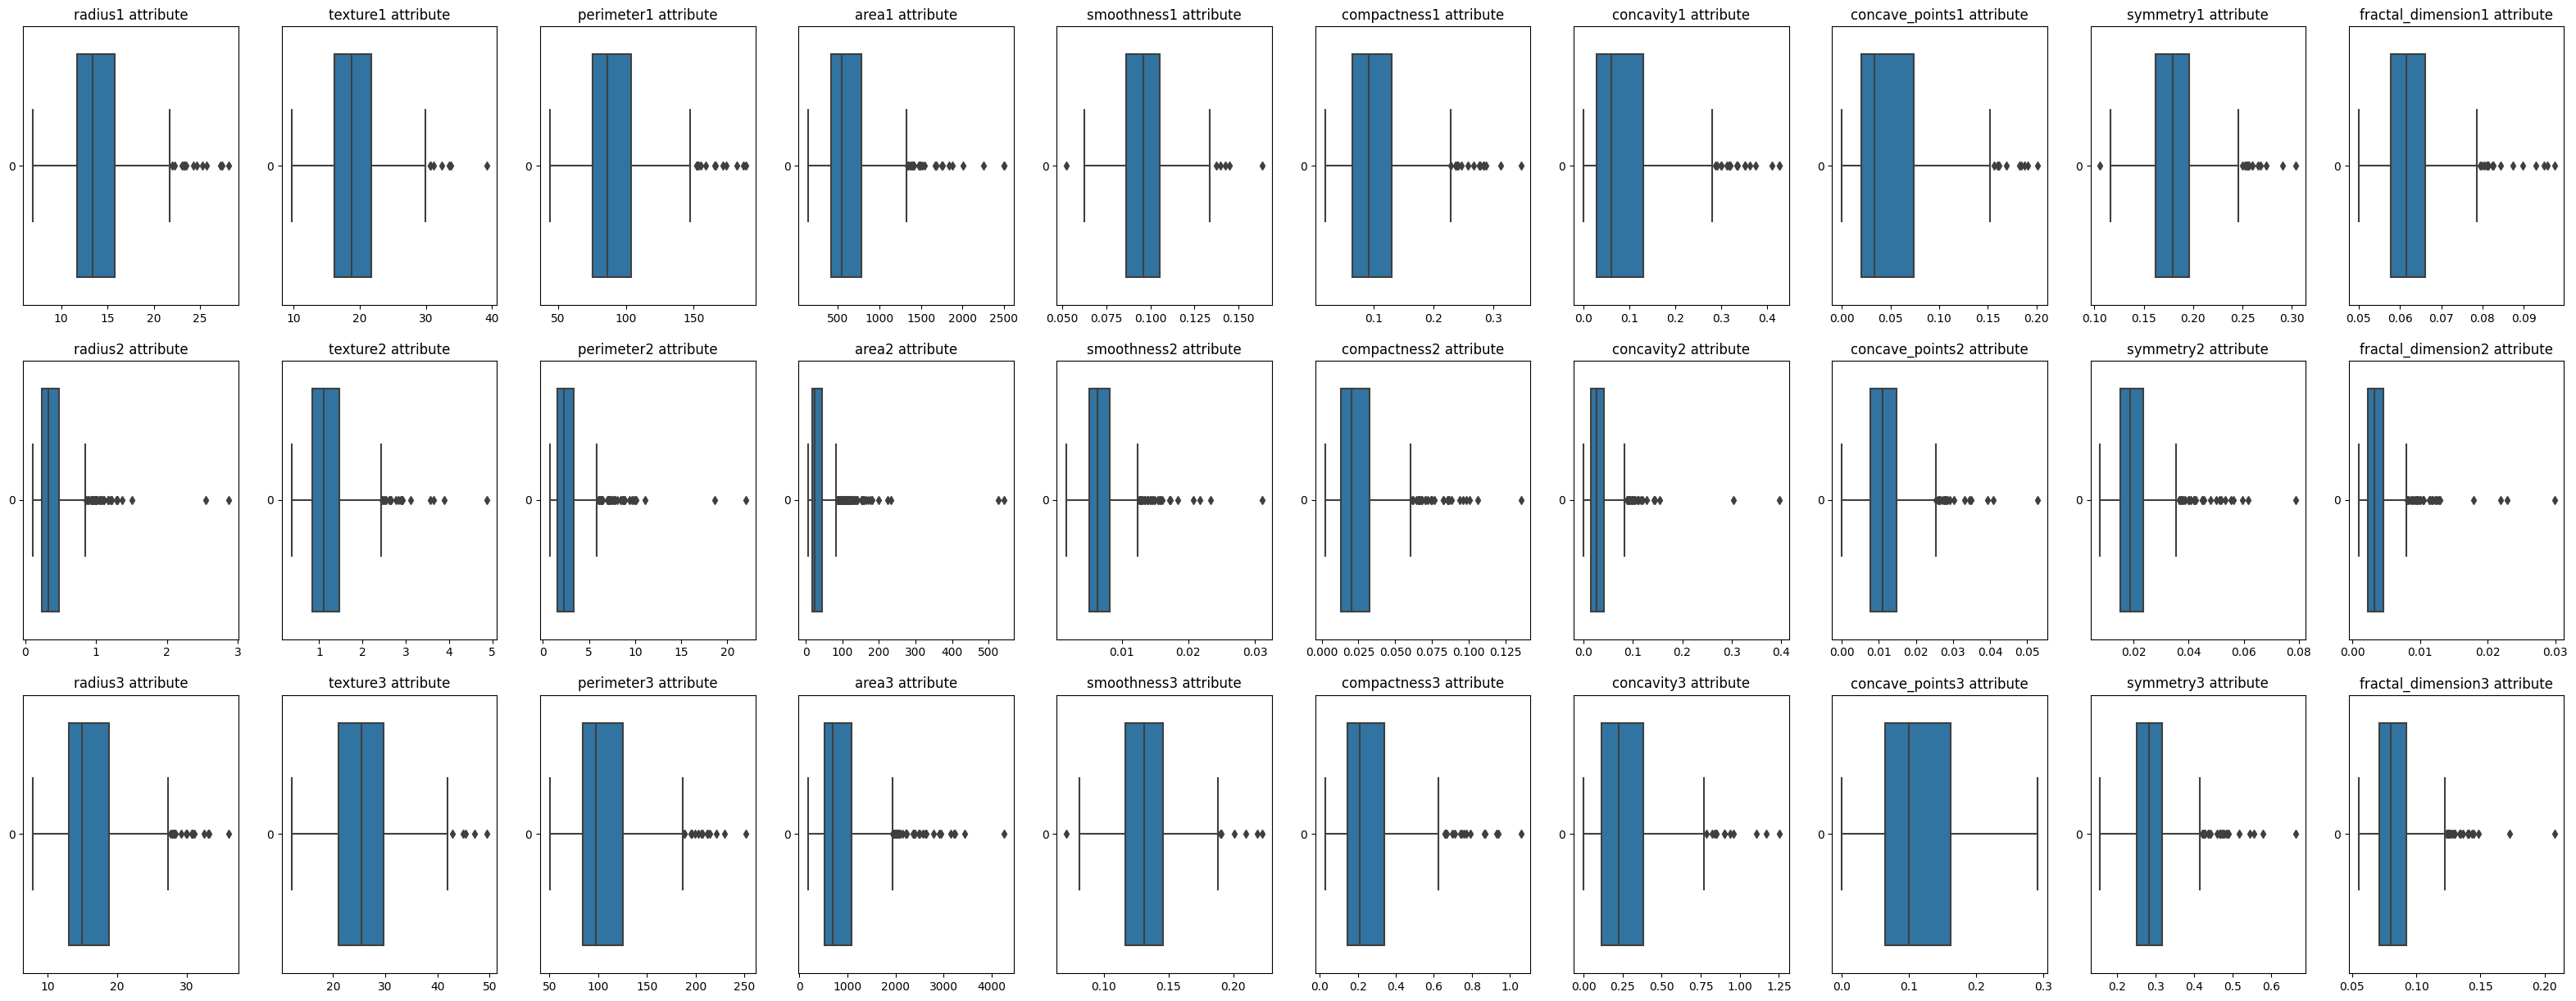

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 10, figsize = (40,15))
#for i in range(len(data_df.columns[1:])):
position = 0
for i in range(3):
  for j in range(10):
    sns.boxplot(data = data_df[names[position]], ax = axes[i, j], orient = "h").set_title(f"{names[position]} attribute")
    sns.set
    position += 1



### **Check for missing values**

In [ ]:
missing_vals_total = data.isnull().sum().sort_values(ascending=False)

In [ ]:
missing_vals_total

ID                    0
Diagnosis             0
symmetry3             0
concave_points3       0
concavity3            0
compactness3          0
smoothness3           0
area3                 0
perimeter3            0
texture3              0
radius3               0
fractal_dimension2    0
symmetry2             0
concave_points2       0
concavity2            0
compactness2          0
smoothness2           0
area2                 0
perimeter2            0
texture2              0
radius2               0
fractal_dimension1    0
symmetry1             0
concave_points1       0
concavity1            0
compactness1          0
smoothness1           0
area1                 0
perimeter1            0
texture1              0
radius1               0
fractal_dimension3    0
dtype: int64

We separate the X and Y from the dataframe using the row and column indices

In [ ]:
X = data_df.iloc[:, 1:]
y = data_df.iloc[:, 0]

In [ ]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Checking that y dataframe got processed like we wanted

In [ ]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

Checking that X dataframe got processed like we wanted

In [ ]:
display(X)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Encoding the Diagnosis column

In [ ]:
le = LabelEncoder()
le.fit(["B", "M"])
y_transformed = le.transform(y)
name_col = ["Diagnosis"]
y_transformed = pd.DataFrame(data = y_transformed, columns = name_col)
y_transformed

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


We need to check if the two classes of tumors are equally balanced, otherwise we'll need to use stratified sampling when splitting the training and test sets

In [ ]:
y_transformed.value_counts()

Diagnosis
0            357
1            212
dtype: int64

As we can see, the classes are imbalanced so we indeed need to use stratified sampling

# **Pipeline Implementation**

#### **Implementing the KNN**

Pipeline Initialization (Using sklearn Pipeline)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('knn', KNeighborsClassifier())  # kNN classifier
])

Min-max scaling the X using the pipeline steps

In [ ]:
X_col_names = X.columns.tolist()

In [ ]:
X_scaled = pipeline.named_steps['scaler'].fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X_col_names)
X_scaled.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


We need to verify that the Pipeline scaled the X properly so we describe the scaled X dataframe and verify that the range of each feature is between 0 and 1

In [ ]:
X_scaled.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size = 0.2, random_state = 42, stratify = y_transformed)

Hyperparameter tuning using GridSearchCV

In [ ]:
#Implementing GridSearchCV as a step in the pipeline
#param_grid specifies the range of the k we're evaluating the performance with
param_grid = {'knn__n_neighbors': range(1, 11)}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='f1')

In [ ]:
#Fitting the pipeline (with grid search too) on the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 11)}, scoring='f1')

Getting the Best-performing K in terms of F1 score and displaying its actual f1 score

In [ ]:
#Getting the best value of k and its corresponding F1 score
best_k = grid_search.best_params_['knn__n_neighbors']
best_f1 = grid_search.best_score_
print(f'Best k value: {best_k}')
print(f'Best F1 score: {best_f1:.4f}')

Best k value: 7
Best F1 score: 0.9632


We can clearly see that the ideal value of K is 7

### **F1 Score(for each value of k)**

In [ ]:
results_f1 = grid_search.cv_results_
results_f1 = pd.DataFrame(results_f1)
results_f1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008391,0.005256,0.028557,0.019186,1,{'knn__n_neighbors': 1},0.925373,0.971429,0.937500,0.956522,0.914286,0.941022,0.020673,10
1,0.006395,0.001603,0.019004,0.001862,2,{'knn__n_neighbors': 2},0.920635,0.985075,0.903226,0.969697,0.939394,0.943605,0.030253,9
2,0.006176,0.000487,0.019126,0.004304,3,{'knn__n_neighbors': 3},0.953846,1.000000,0.903226,0.969697,0.911765,0.947707,0.036128,4
3,0.003377,0.000138,0.009863,0.000395,4,{'knn__n_neighbors': 4},0.953846,1.000000,0.885246,0.969697,0.925373,0.946832,0.039121,5
4,0.003387,0.000099,0.010159,0.000672,5,{'knn__n_neighbors': 5},0.953846,1.000000,0.920635,0.955224,0.925373,0.951016,0.028304,2
5,0.003965,0.000337,0.011146,0.000763,6,{'knn__n_neighbors': 6},0.937500,1.000000,0.903226,0.969697,0.923077,0.946700,0.034358,6
6,0.004169,0.000884,0.012485,0.002127,7,{'knn__n_neighbors': 7},0.953846,1.000000,0.937500,0.985075,0.939394,0.963163,0.025090,1
7,0.003556,0.000314,0.010071,0.000479,8,{'knn__n_neighbors': 8},0.937500,0.985075,0.903226,0.969697,0.923077,0.943715,0.029965,8
8,0.004360,0.001072,0.011459,0.001573,9,{'knn__n_neighbors': 9},0.937500,0.985075,0.937500,0.969697,0.923077,0.950570,0.023039,3
9,0.004175,0.001027,0.014496,0.004387,10,{'knn__n_neighbors': 10},0.937500,0.985075,0.920635,0.953846,0.923077,0.944027,0.023707,7


In [ ]:
results_f1 = results_f1[['param_knn__n_neighbors', 'mean_test_score']]

# Rename columns for clarity
results_f1.columns = ['k', 'F1 Score']
results_f1

,k,F1 Score
0,1,0.941022
1,2,0.943605
2,3,0.947707
3,4,0.946832
4,5,0.951016
5,6,0.946700
6,7,0.963163
7,8,0.943715
8,9,0.950570
9,10,0.944027


#### **Plotting the F1 Score of each value of K (with the training set)**

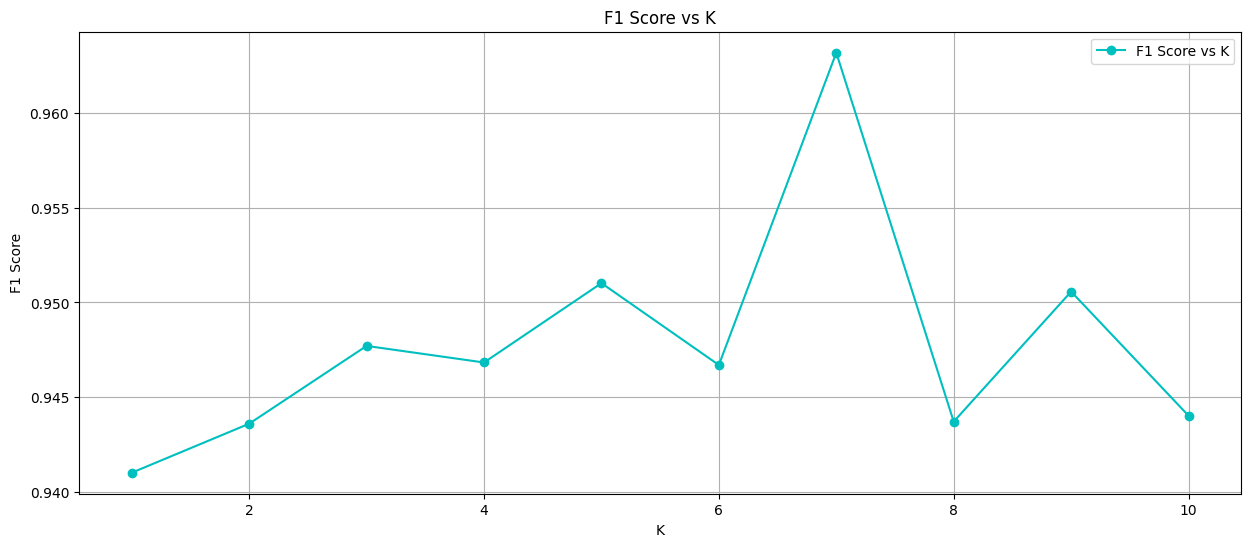

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(results_f1['k'], results_f1['F1 Score'], marker='o', label='F1 Score vs K', linestyle = '-', color='c')
plt.title('F1 Score vs K')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.show()

### Let's evaluate the performance for each value of K with the accuracy and precison metrics as well.

### **Accuracy**

In [ ]:
#Implementing GridSearchCV as a step in the pipeline
#param_grid specifies the range of the k we're evaluating the performance with
param_grid = {'knn__n_neighbors': range(1, 11)}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy')

In [ ]:
#Fitting the pipeline (with grid search too) on the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 11)}, scoring='accuracy')

In [ ]:
#Getting the best value of k and its corresponding F1 score
best_k = grid_search.best_params_['knn__n_neighbors']
best_accuracy = grid_search.best_score_
print(f'Best k value: {best_k}')
print(f'Best F1 score: {best_accuracy:.4f}')

Best k value: 7
Best F1 score: 0.9736


In [ ]:
results_accuracy = grid_search.cv_results_
results_accuracy = pd.DataFrame(results_accuracy)
results_accuracy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004355,0.001023,0.007975,0.001062,1,{'knn__n_neighbors': 1},0.945055,0.978022,0.956044,0.967033,0.934066,0.956044,0.015541,10
1,0.003907,0.000533,0.007770,0.000895,2,{'knn__n_neighbors': 2},0.945055,0.989011,0.934066,0.978022,0.956044,0.960440,0.020382,9
2,0.003607,0.000128,0.009482,0.003640,3,{'knn__n_neighbors': 3},0.967033,1.000000,0.934066,0.978022,0.934066,0.962637,0.025631,4
3,0.004733,0.002360,0.008912,0.001895,4,{'knn__n_neighbors': 4},0.967033,1.000000,0.923077,0.978022,0.945055,0.962637,0.026556,4
4,0.003454,0.000043,0.007228,0.000212,5,{'knn__n_neighbors': 5},0.967033,1.000000,0.945055,0.967033,0.945055,0.964835,0.020143,2
5,0.003549,0.000040,0.008027,0.001453,6,{'knn__n_neighbors': 6},0.956044,1.000000,0.934066,0.978022,0.945055,0.962637,0.023671,4
6,0.004145,0.000929,0.008557,0.002163,7,{'knn__n_neighbors': 7},0.967033,1.000000,0.956044,0.989011,0.956044,0.973626,0.017855,1
7,0.004077,0.000733,0.009012,0.002294,8,{'knn__n_neighbors': 8},0.956044,0.989011,0.934066,0.978022,0.945055,0.960440,0.020382,7
8,0.004236,0.001407,0.008116,0.000934,9,{'knn__n_neighbors': 9},0.956044,0.989011,0.956044,0.978022,0.945055,0.964835,0.016150,2
9,0.003680,0.000174,0.007797,0.000629,10,{'knn__n_neighbors': 10},0.956044,0.989011,0.945055,0.967033,0.945055,0.960440,0.016447,7


In [ ]:
results_accuracy = results_accuracy[['param_knn__n_neighbors', 'mean_test_score']]

#Renaming the columns for clarity
results_accuracy.columns = ['k', 'Accuracy']
results_accuracy

,k,Accuracy
0,1,0.956044
1,2,0.960440
2,3,0.962637
3,4,0.962637
4,5,0.964835
5,6,0.962637
6,7,0.973626
7,8,0.960440
8,9,0.964835
9,10,0.960440


Plotting the Accuracy for each value of K

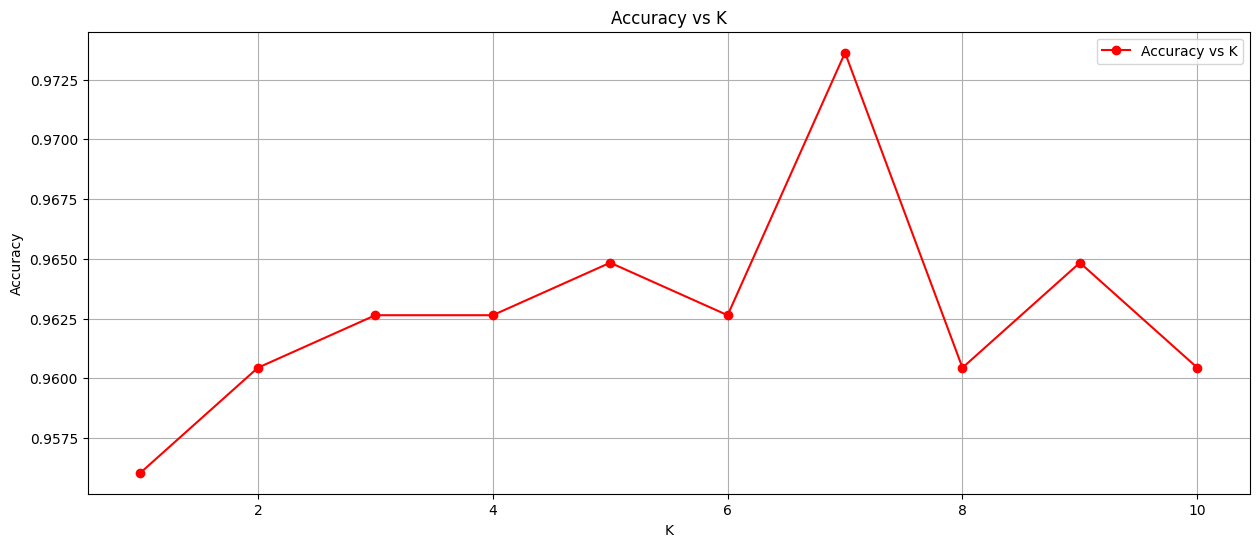

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(results_accuracy['k'], results_accuracy['Accuracy'], marker='o', label='Accuracy vs K', linestyle = '-', color='r')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Again, the value of K = 7 is the clearly the best option in terms of accuracy

### **Precision**

In [ ]:
#Implementing GridSearchCV as a step in the pipeline
#param_grid specifies the range of the k we're evaluating the performance with
param_grid = {'knn__n_neighbors': range(1, 11)}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='precision')

In [ ]:
#Fitting the pipeline (with grid search too) on the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 11)},
             scoring='precision')

In [ ]:
#Getting the best value of k and its corresponding Precision
best_k = grid_search.best_params_['knn__n_neighbors']
best_precision = grid_search.best_score_
print(f'Best k value: {best_k}')
print(f'Best Precision: {best_precision:.4f}')

Best k value: 2
Best Precision: 0.9938


In [ ]:
results_precision = grid_search.cv_results_
results_precision = pd.DataFrame(results_precision)
results_precision

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005185,0.000204,0.017798,0.004855,1,{'knn__n_neighbors': 1},0.939394,0.944444,1.0,0.942857,0.888889,0.943117,0.035191,10
1,0.006055,0.001648,0.020639,0.009661,2,{'knn__n_neighbors': 2},1.000000,1.000000,1.0,1.000000,0.968750,0.993750,0.012500,1
2,0.005666,0.000954,0.015506,0.000512,3,{'knn__n_neighbors': 3},1.000000,1.000000,1.0,1.000000,0.911765,0.982353,0.035294,8
3,0.005383,0.000984,0.017912,0.004733,4,{'knn__n_neighbors': 4},1.000000,1.000000,1.0,1.000000,0.939394,0.987879,0.024242,7
4,0.006043,0.002655,0.017243,0.005276,5,{'knn__n_neighbors': 5},1.000000,1.000000,1.0,0.969697,0.939394,0.981818,0.024242,9
5,0.005180,0.000409,0.019499,0.002601,6,{'knn__n_neighbors': 6},1.000000,1.000000,1.0,1.000000,0.967742,0.993548,0.012903,3
6,0.008668,0.005151,0.019048,0.003276,7,{'knn__n_neighbors': 7},1.000000,1.000000,1.0,1.000000,0.968750,0.993750,0.012500,1
7,0.006364,0.002026,0.017142,0.001332,8,{'knn__n_neighbors': 8},1.000000,1.000000,1.0,1.000000,0.967742,0.993548,0.012903,3
8,0.007075,0.003323,0.019081,0.003895,9,{'knn__n_neighbors': 9},1.000000,1.000000,1.0,1.000000,0.967742,0.993548,0.012903,3
9,0.007594,0.003749,0.019104,0.004969,10,{'knn__n_neighbors': 10},1.000000,1.000000,1.0,1.000000,0.967742,0.993548,0.012903,3


In [ ]:
results_precision = results_precision[['param_knn__n_neighbors', 'mean_test_score']]

#Renaming the columns for clarity
results_precision.columns = ['k', 'Precision']
results_precision

,k,Precision
0,1,0.943117
1,2,0.993750
2,3,0.982353
3,4,0.987879
4,5,0.981818
5,6,0.993548
6,7,0.993750
7,8,0.993548
8,9,0.993548
9,10,0.993548


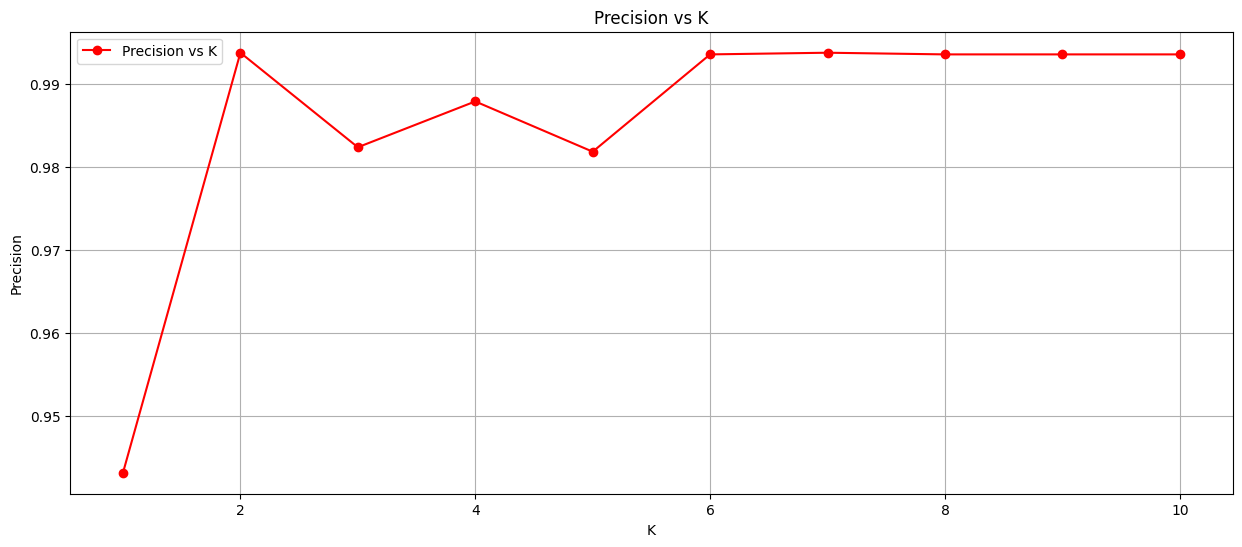

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(results_precision['k'], results_precision['Precision'], marker='o', label='Precision vs K', linestyle = '-', color='r')
plt.title('Precision vs K')
plt.xlabel('K')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()

The plot shows that K = 2 might be the best option for the Precision. **However**, when we check the results dataframe, we find that both K = 2 and K =7, in fact <ins>have the same Precision score up to 6 decimal places</ins>. Therefore, K =7 still holds as the best overall option for a parameter.

## **Summary of the Training Set results**

To summarize the results with the training set, the optimum value for our use <ins>is K = 7.</ins> We will visualize all the results in a single figure to get a visual confirmation of the whole situation.

Since we only have 3 plots to plot, we can manually set the index for the axis

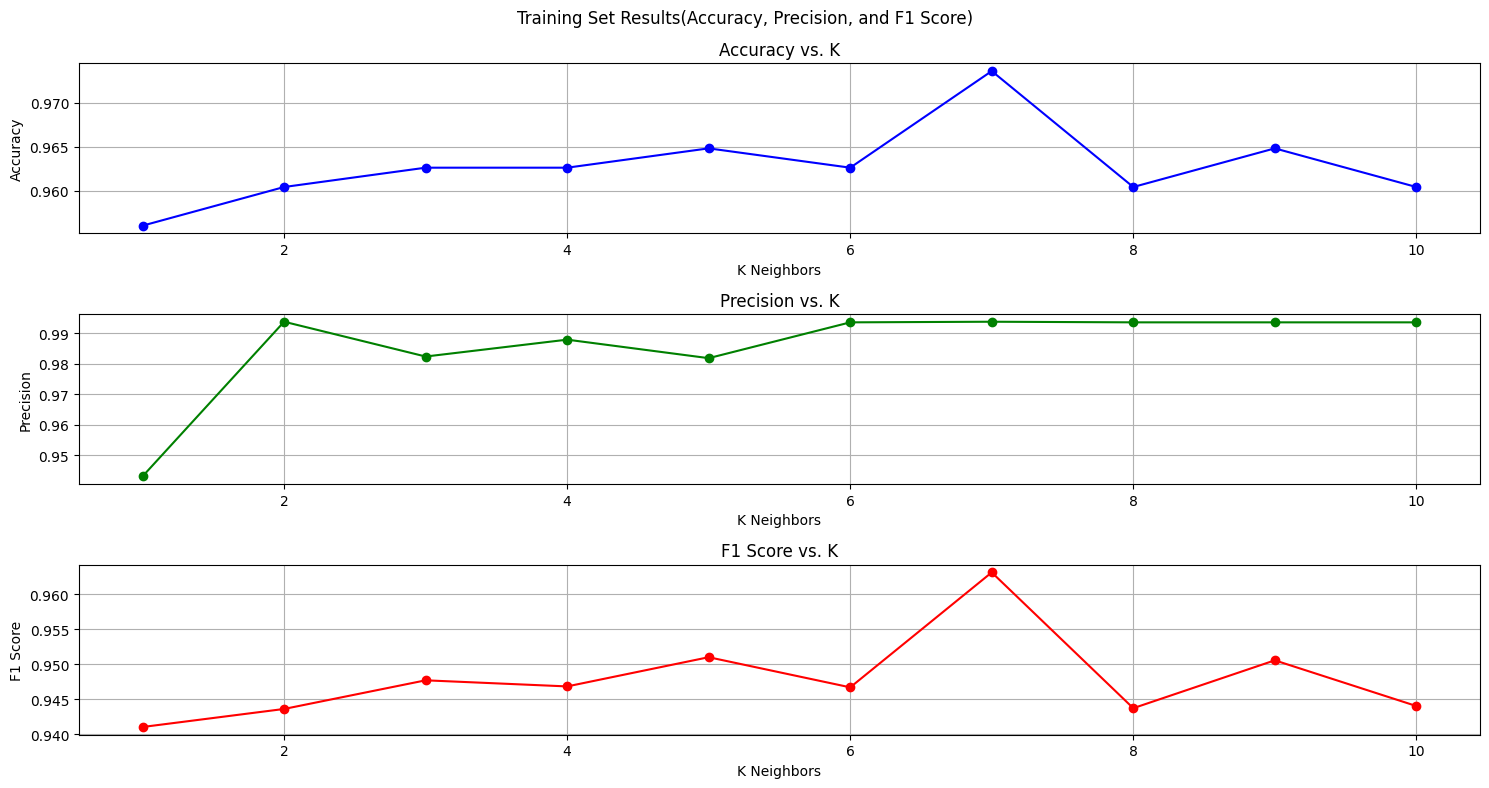

In [ ]:
#Creating a single figure with a single column of subplots for all the evaluated metrics
fig, axes = plt.subplots(3, 1, figsize=(15, 8))

#Setting the title for the Whole figure
fig.suptitle('Training Set Results(Accuracy, Precision, and F1 Score)')

#1st Line plot for the accuracy results
axes[0].plot(results_accuracy['k'], results_accuracy['Accuracy'], marker='o', color='b')
axes[0].set_title('Accuracy vs. K')
axes[0].set_xlabel('K Neighbors')
axes[0].set_ylabel('Accuracy')
axes[0].grid(True)

#2nd Line plot for the precision results
axes[1].plot(results_precision['k'], results_precision['Precision'], marker='o', color='g')
axes[1].set_title('Precision vs. K')
axes[1].set_xlabel('K Neighbors')
axes[1].set_ylabel('Precision')
axes[1].grid(True)

#3rd Line plot for the F1 results
axes[2].plot(results_f1['k'], results_f1['F1 Score'], marker='o', color='r')
axes[2].set_title('F1 Score vs. K')
axes[2].set_xlabel('K Neighbors')
axes[2].set_ylabel('F1 Score')
axes[2].grid(True)

#Adjusting the subplot spacing (to avoid overlapping of axis labels)
plt.tight_layout()

#Showing the combined figure
plt.show()


### **Comparing the F1 Score for the optimum value of K for the training and test sets**

Since the F1 score is the only metric we focus on, we'll only compare the performance of the traing and test sets for the F1 Score. To do that, we need to use KNeighborsClassifier for the training set, then get the results, and then compare the results

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Making predictions on the test set
y_pred = KNN.predict(X_test)

In [ ]:
#Getting the f1 sscore for the predictions and printing it
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.4f}")

F1 score: 0.9383


So now we can see that the F1 score of the test set is 0.9383, which is lsightly lower than the traing set. However this is a high F1 score and is acceptable. As a final step,w we need to visualize the results in the form of a bar chart. To do so, we'll need to create a dataframe for the newly predicted results.

In [ ]:
#Creating adictionary with the values
vals = {
    'Data Set Type' : ['Training Set', 'Test Set'],
    'F1 Score' : [0.963163, float(f1)]

}

#Creating the Pandas Dataframe by converting the dictionary to a Pandas Dataframe
f1_compare = pd.DataFrame(vals)

f1_compare

,Data Set Type,F1 Score
0,Training Set,0.963163
1,Test Set,0.938272


After having created the dataframe, we visualize the results

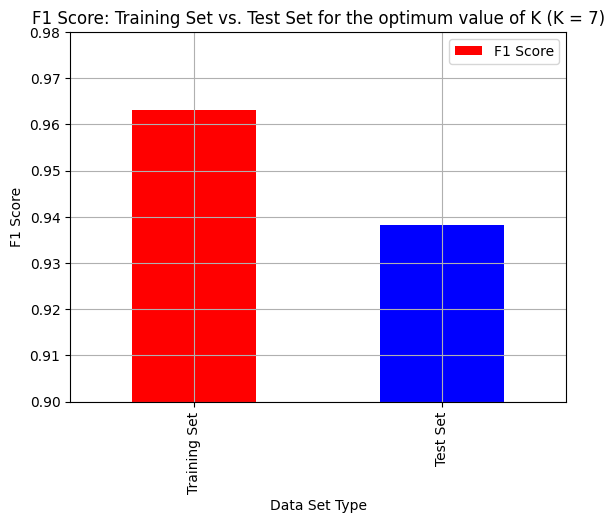

In [ ]:
f1_compare.plot.bar(x = 'Data Set Type', y = 'F1 Score', color = ['red', 'blue'])
plt.xlabel('Data Set Type')
plt.ylabel('F1 Score')
plt.title('F1 Score: Training Set vs. Test Set for the optimum value of K (K = 7)')
#Adjusting the y-axis limits to
plt.ylim(0.9, 0.98)
plt.grid(True)
plt.show()